## Ultralytics model 

In [33]:
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load an official model

# Export the model
model.export(format="torchscript")

100%|██████████| 6.25M/6.25M [00:00<00:00, 15.7MB/s]


Ultralytics 8.3.36 🚀 Python-3.11.2 torch-2.5.1 CPU (Cortex-A76)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

TorchScript: starting export with torch 2.5.1...
TorchScript: export success ✅ 4.2s, saved as 'yolov8n.torchscript' (12.5 MB)

Export complete (7.3s)
Results saved to /home/bing/code/open-source/rpi-deploy/objection_detection/python
Predict:         yolo predict task=detect model=yolov8n.torchscript imgsz=640  
Validate:        yolo val task=detect model=yolov8n.torchscript imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


'yolov8n.torchscript'

In [2]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s


image 1/1 /home/bing/code/open-source/rpi-deploy/objection_detection/python/../../data/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 433.7ms
Speed: 15.2ms preprocess, 433.7ms inference, 17.2ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 5.,  0.,  0.,  0., 11.,  0.])
conf: tensor([0.8705, 0.8690, 0.8536, 0.8193, 0.3461, 0.3013])
data: tensor([[1.7286e+01, 2.3059e+02, 8.0152e+02, 7.6841e+02, 8.7054e-01, 5.0000e+00],
        [4.8739e+01, 3.9926e+02, 2.4450e+02, 9.0250e+02, 8.6898e-01, 0.0000e+00],
        [6.7027e+02, 3.8028e+02, 8.0986e+02, 8.7569e+02, 8.5360e-01, 0.0000e+00],
        [2.2139e+02, 4.0579e+02, 3.4472e+02, 8.5739e+02, 8.1931e-01, 0.0000e+00],
        [6.4341e-02, 2.5464e+02, 3.2288e+01, 3.2504e+02, 3.4607e-01, 1.1000e+01],
        [0.0000e+00, 5.5101e+02, 6.7105e+01, 8.7394e+02, 3.0129e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([6, 6])
xywh: tensor([[40

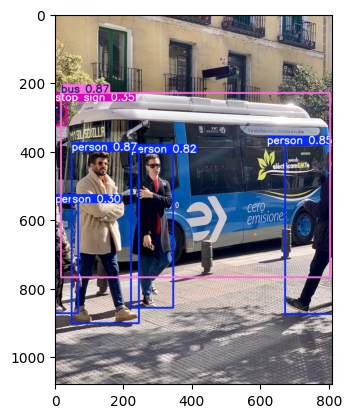

In [3]:
# Example image URL or path
img = '../../data/bus.jpg'  # Replace with your image path or URL

# Perform inference
results = model(img)

# View results
for r in results:
    print(r.boxes)  # print the Boxes object containing the detection bounding boxes

# Visualize the results
for i, r in enumerate(results):
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Save results to disk
    r.save(filename=f"results{i}.jpg")

    plt.imshow(im_rgb)

- ultralytics preprocessing

In [4]:
import torch
model = torch.jit.load('yolov8n.torchscript')

for name, module in model.named_modules():
    print(f"Layer: {name}, Type: {type(module).__name__}")

Layer: , Type: RecursiveScriptModule
Layer: model, Type: RecursiveScriptModule
Layer: model.0, Type: RecursiveScriptModule
Layer: model.0.conv, Type: RecursiveScriptModule
Layer: model.0.act, Type: RecursiveScriptModule
Layer: model.1, Type: RecursiveScriptModule
Layer: model.1.conv, Type: RecursiveScriptModule
Layer: model.1.act, Type: RecursiveScriptModule
Layer: model.2, Type: RecursiveScriptModule
Layer: model.2.cv1, Type: RecursiveScriptModule
Layer: model.2.cv1.conv, Type: RecursiveScriptModule
Layer: model.2.cv1.act, Type: RecursiveScriptModule
Layer: model.2.cv2, Type: RecursiveScriptModule
Layer: model.2.cv2.conv, Type: RecursiveScriptModule
Layer: model.2.cv2.act, Type: RecursiveScriptModule
Layer: model.2.m, Type: RecursiveScriptModule
Layer: model.2.m.0, Type: RecursiveScriptModule
Layer: model.2.m.0.cv1, Type: RecursiveScriptModule
Layer: model.2.m.0.cv1.conv, Type: RecursiveScriptModule
Layer: model.2.m.0.cv1.act, Type: RecursiveScriptModule
Layer: model.2.m.0.cv2, Type: 

In [5]:
for name, param in model.named_parameters():
    print(f"Parameter: {name}, Shape: {param.shape}")

Parameter: model.0.conv.weight, Shape: torch.Size([16, 3, 3, 3])
Parameter: model.0.conv.bias, Shape: torch.Size([16])
Parameter: model.1.conv.weight, Shape: torch.Size([32, 16, 3, 3])
Parameter: model.1.conv.bias, Shape: torch.Size([32])
Parameter: model.2.cv1.conv.weight, Shape: torch.Size([32, 32, 1, 1])
Parameter: model.2.cv1.conv.bias, Shape: torch.Size([32])
Parameter: model.2.cv2.conv.weight, Shape: torch.Size([32, 48, 1, 1])
Parameter: model.2.cv2.conv.bias, Shape: torch.Size([32])
Parameter: model.2.m.0.cv1.conv.weight, Shape: torch.Size([16, 16, 3, 3])
Parameter: model.2.m.0.cv1.conv.bias, Shape: torch.Size([16])
Parameter: model.2.m.0.cv2.conv.weight, Shape: torch.Size([16, 16, 3, 3])
Parameter: model.2.m.0.cv2.conv.bias, Shape: torch.Size([16])
Parameter: model.3.conv.weight, Shape: torch.Size([64, 32, 3, 3])
Parameter: model.3.conv.bias, Shape: torch.Size([64])
Parameter: model.4.cv1.conv.weight, Shape: torch.Size([64, 64, 1, 1])
Parameter: model.4.cv1.conv.bias, Shape: to

In [6]:
from torchinfo import summary
summary(model, input_size=(1, 3, 640, 640))

Layer (type:depth-idx)                        Output Shape              Param #
DetectionModel                                --                        --
├─Sequential: 1-1                             --                        --
│    └─Conv: 2-1                              --                        --
│    │    └─Conv2d: 3-1                       --                        (448)
│    │    └─SiLU: 3-2                         --                        --
│    └─Conv: 2-2                              --                        --
│    │    └─Conv2d: 3-3                       --                        (4,640)
│    │    └─SiLU: 3-4                         --                        --
│    └─C2f: 2-3                               --                        --
│    │    └─Conv: 3-5                         --                        (1,056)
│    │    └─Conv: 3-6                         --                        (1,568)
│    │    └─ModuleList: 3-7                   --                        (4,64

## My model 

In [ ]:
!wget https://github.com/jahongir7174/YOLOv8-pt/blob/master/weights/best.pt

# rename best.pt to yolov8n.pt
# convert yolov8n.pt to yolov8n_torchscript.pt 

In [ ]:
import torch

loaded_model = torch.jit.load("/home/bing/code/checkpoints/yolov8n/yolov8n_torchscript.pt")
loaded_model.eval()

example_input = torch.rand(1, 3, 640, 640)


# Perform inference using the loaded model
with torch.no_grad():  # Disable gradient calculation for inference
    output = loaded_model(example_input)

# Print the output shape
print(output.shape)

# import pnnx 
# pnnx.convert("/home/bing/code/checkpoints/yolov8n/yolov8n_torchscript.pt", inputs=example_input)


torch.Size([1, 84, 8400])


/home/bing/envs/pytorch/lib/python3.11/site-packages/torch/nn/modules/module.py:1747: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3595.)
  return forward_call(*args, **kwargs)


In [85]:
def resize(image, input_size, augment=False):
    # Resize and pad image while meeting stride-multiple constraints
    shape = image.shape[:2]  # current shape [height, width]

    # Scale ratio (new / old)
    r = min(input_size / shape[0], input_size / shape[1])
    if not augment:  # only scale down, do not scale up (for better val mAP)
        r = min(r, 1.0)

    # Compute padding
    pad = int(round(shape[1] * r)), int(round(shape[0] * r))
    w = (input_size - pad[0]) / 2
    h = (input_size - pad[1]) / 2

    if shape[::-1] != pad:  # resize
        image = cv2.resize(image,
                        dsize=pad,
                        interpolation=resample() if augment else cv2.INTER_LINEAR)
    top, bottom = int(round(h - 0.1)), int(round(h + 0.1))
    left, right = int(round(w - 0.1)), int(round(w + 0.1))
    image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT)  # add border
    return image, (r, r), (w, h)

def wh2xy(x):
    y = x.clone()
    y[..., 0] = x[..., 0] - x[..., 2] / 2  # top left x
    y[..., 1] = x[..., 1] - x[..., 3] / 2  # top left y
    y[..., 2] = x[..., 0] + x[..., 2] / 2  # bottom right x
    y[..., 3] = x[..., 1] + x[..., 3] / 2  # bottom right y
    return y

def non_max_suppression(prediction, conf_threshold=0.25, iou_threshold=0.45):
    nc = prediction.shape[1] - 4  # number of classes
    xc = prediction[:, 4:4 + nc].amax(1) > conf_threshold  # candidates

    # Settings
    max_wh = 7680  # (pixels) maximum box width and height
    max_det = 300  # the maximum number of boxes to keep after NMS
    max_nms = 30000  # maximum number of boxes into torchvision.ops.nms()

    start = time.time()
    outputs = [torch.zeros((0, 6), device=prediction.device)] * prediction.shape[0]
    for index, x in enumerate(prediction):  # image index, image inference
        # Apply constraints
        x = x.transpose(0, -1)[xc[index]]  # confidence

        # If none remain process next image
        if not x.shape[0]:
            continue

        # Detections matrix nx6 (box, conf, cls)
        box, cls = x.split((4, nc), 1)
        # center_x, center_y, width, height) to (x1, y1, x2, y2)
        box = wh2xy(box)
        if nc > 1:
            i, j = (cls > conf_threshold).nonzero(as_tuple=False).T
            x = torch.cat((box[i], x[i, 4 + j, None], j[:, None].float()), 1)
        else:  # best class only
            conf, j = cls.max(1, keepdim=True)
            x = torch.cat((box, conf, j.float()), 1)[conf.view(-1) > conf_threshold]
        # Check shape
        if not x.shape[0]:  # no boxes
            continue
        # sort by confidence and remove excess boxes
        x = x[x[:, 4].argsort(descending=True)[:max_nms]]

        # Batched NMS
        c = x[:, 5:6] * max_wh  # classes
        boxes, scores = x[:, :4] + c, x[:, 4]  # boxes (offset by class), scores
        i = torchvision.ops.nms(boxes, scores, iou_threshold)  # NMS
        i = i[:max_det]  # limit detections
        outputs[index] = x[i]
        if (time.time() - start) > 0.5 + 0.05 * prediction.shape[0]:
            print(f'WARNING ⚠️ NMS time limit {0.5 + 0.05 * prediction.shape[0]:.3f}s exceeded')
            break  # time limit exceeded

    return outputs

In [106]:
import torch 
import torchvision
import time 
import cv2 
import numpy 

class YOLOV8_Inference():
    # torchscript inference 
    def __init__(self, model):
        super().__init__()

        self.input_size = 640
        self.model = torch.jit.load(model)

    def load_image(self, image):
        image = cv2.imread(image)
        h, w = image.shape[:2]
        shape = (h, w)
        r = self.input_size / max(h, w)
        if r != 1:
            image = cv2.resize(image,
                               dsize=(int(w * r), int(h * r)),
                               interpolation=cv2.INTER_LINEAR)
        return image, (h, w)

    def preprocessing(self, image):
        # load image
        image, shape = self.load_image(image)
        h, w = image.shape[:2]
        
        # resize
        image, ratio, pad = resize(image, self.input_size)
        self.shapes = shape, ((h / shape[0], w / shape[1]), pad)  # for COCO mAP rescaling

        # Convert HWC to CHW, BGR to RGB
        sample = image.transpose((2, 0, 1))[::-1]
        sample = numpy.ascontiguousarray(sample)
        sample = torch.from_numpy(sample)
        sample = sample.float()
        sample = sample / 255.0
        
        sample = sample[None, ...]

        return sample

    def forward(self, x):
        with torch.no_grad():  # Disable gradient calculation for inference
            outputs = self.model(x)
        return outputs

    def postprocessing(self, outputs):
        results = non_max_suppression(outputs, 0.45, 0.65) 

        # rescale 
        print(self.shapes)
        shape2 = self.shapes[0]
        ratio_pad = self.shapes[1]
        gain = ratio_pad[0][0]
        pad = ratio_pad[1]

        coords = results[0][:,:4].clone()
        coords[:, [0, 2]] -= pad[0]  # x padding
        coords[:, [1, 3]] -= pad[1]  # y padding
        coords[:, :4] /= gain

        coords[:, 0].clamp_(0, shape2[1])  # x1
        coords[:, 1].clamp_(0, shape2[0])  # y1
        coords[:, 2].clamp_(0, shape2[1])  # x2
        coords[:, 3].clamp_(0, shape2[0])  # y2

        return torch.hstack((coords, results[0][:,4:]))
        # return coords
        

    def inference(self, image):
        self.inputs = self.preprocessing(image)
        outputs = self.forward(self.inputs)
        results = self.postprocessing(outputs)
        return results


In [109]:
# image_file = '/home/bing/code/open-source/rpi-deploy/data/000000182611.jpg'
image_file = '/home/bing/code/open-source/rpi-deploy/data/bus.jpg'

model_file = '/home/bing/code/checkpoints/yolov8n/yolov8n_torchscript.pt'

model = YOLOV8_Inference(model_file)
results = model.inference(image_file)
print('results: ', results)


((1080, 810), ((0.5925925925925926, 0.5925925925925926), (80.0, 0.0)))
results:  tensor([[4.9055e+01, 3.9874e+02, 2.3998e+02, 9.0388e+02, 8.9029e-01, 0.0000e+00],
        [2.2323e+02, 4.0626e+02, 3.4699e+02, 8.6043e+02, 8.5662e-01, 0.0000e+00],
        [6.7184e+02, 3.8986e+02, 8.0918e+02, 8.7642e+02, 7.6792e-01, 0.0000e+00],
        [2.5188e+01, 2.2981e+02, 8.0268e+02, 7.3922e+02, 7.5481e-01, 5.0000e+00]])


results:  [[ 49.05471  398.7404   239.9838   903.87964 ]
 [223.22589  406.25613  346.988    860.428   ]
 [671.83966  389.85803  809.1795   876.4203  ]
 [ 25.188465 229.81165  802.6794   739.2183  ]]
[[ 49 398 239 903]
 [223 406 346 860]
 [671 389 809 876]
 [ 25 229 802 739]]


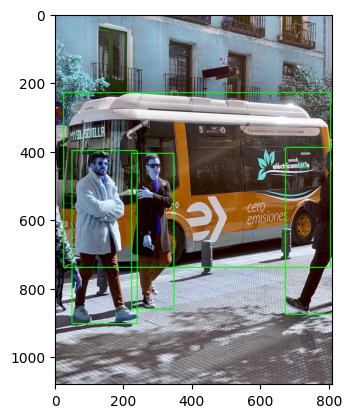

In [110]:
def draw_bboxes(image, bboxes):
    image = cv2.imread(image)

    for bbox in bboxes:
        # Bounding box coordinates (x, y, width, height)
        # bbox = (100, 100, 200, 150)

        # Draw the bounding box
        # x, y, w, h = bbox
        x1, y1, x2, y2 = bbox
        
        cv2.rectangle(image, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=2)
    return image


print('results: ', results.numpy()[:,:4])
bboxes = results.numpy()[:,:4].astype(numpy.int32)
print(bboxes)
image = draw_bboxes(image_file, bboxes)
plt.imshow(image)
